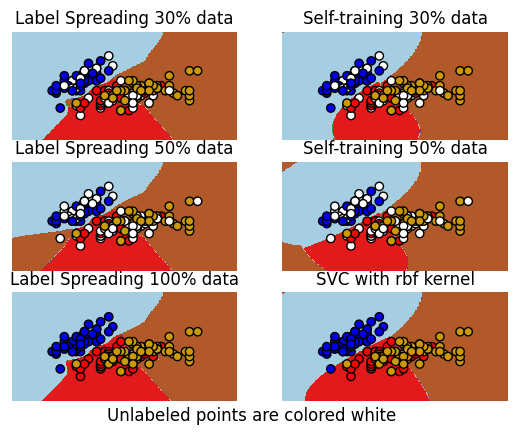

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()

X = iris.data[:, :2]  # 붓꽃 데이터셋에서 첫 두 특성 사용
y = iris.target  # 붓꽃 데이터셋의 타겟 값

# 메시 그리드의 단계 크기
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # 무작위 샘플을 라벨 없음(-1)으로 설정
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1  # 무작위 샘플의 50%를 라벨 없음(-1)으로 설정

# 라벨 전파 모델 학습
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# 자가 학습 모델 학습
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

# 기본 SVM 분류기 학습
rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# 플롯을 위한 메시 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # 훈련 데이터 포인트 플롯
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()
